<a href="https://colab.research.google.com/github/sandeep1847e/Phy654-data/blob/main/NN_python_output_complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt # for plotting
#import matplotlib
#matplotlib.rcParams['figure.dpi']=300 # high resolution display

Let's start with a neural network with no hidden layer

In [9]:
N0=3 # Number of featurs (or number of nodes in the input layer)
N1=2 # number of nodes in the output layer

# initialize random weights: array dimensions N1xN0
w=np.random.uniform(low=-1,high=+1,size=(N1,N0))

# initialize random biases: N1 vector
b=np.random.uniform(low=-1,high=+1,size=N1)

print ('w\n', w)
print ('\n\nb\n', b)

w
 [[-0.29166166  0.69903507 -0.24219995]
 [-0.63400675 -0.57560565  0.67634211]]


b
 [ 0.9862855  -0.33429538]


In [10]:
# input feature values (giving any random value)
x_in=np.array([0.2,0.4,-0.1])

In [11]:
# evaluate network's prediction by hand
z=np.dot(w,x_in)+b # result: the vector of 'z' values, length N1
y_out=1/(1+np.exp(-z)) # the 'sigmoid' function (applied elementwise)

print ('y_out : ', y_out)

y_out :  [0.77413122 0.31886924]


In [12]:
print("network input x_in:", x_in)
print("weights matrix w:", w)
print("bias vector b:", b)
print("linear superposition z:", z)
print("network output y_out:", y_out)

network input x_in: [ 0.2  0.4 -0.1]
weights matrix w: [[-0.29166166  0.69903507 -0.24219995]
 [-0.63400675 -0.57560565  0.67634211]]
bias vector b: [ 0.9862855  -0.33429538]
linear superposition z: [ 1.23178719 -0.75897321]
network output y_out: [0.77413122 0.31886924]


In [13]:
# a function that applies the network on given inputs
def apply_net(x_in):
    global w, b

    z=np.dot(w,x_in)+b
    return(1/(1+np.exp(-z)))

In [14]:
N0=2 # input layer size
N1=1 # output layer size

w=np.random.uniform(low=-10,high=+10,size=(N1,N0)) # random weights: N1xN0
b=np.random.uniform(low=-1,high=+1,size=N1) # biases: N1 vector

In [15]:
out=apply_net([0.8,0.3]) # a simple test
print (out)
print (out[0])

[4.08402365e-05]
4.0840236549577325e-05


In [16]:
M=50 # will create picture of size MxM
y_out=np.zeros([M,M]) # array MxM, to hold the result

for j1 in range(M):
    for j2 in range(M):
        # out of these integer indices, generate
        # two values in the range -0.5...0.5
        # and then apply the network to those two
        # input values
        value0=float(j1)/M-0.5
        value1=float(j2)/M-0.5
        y_out[j1,j2]=apply_net([value0,value1])[0]

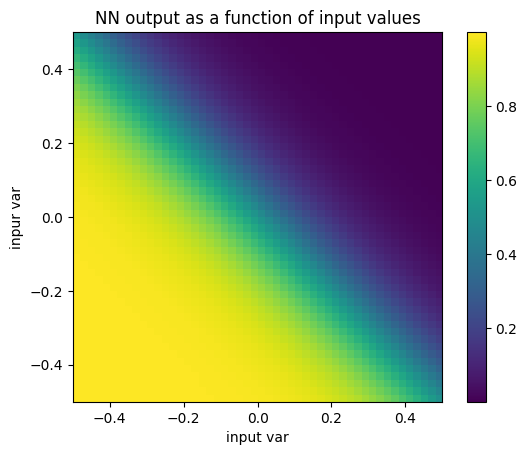

In [17]:
# display image
plt.imshow(y_out,origin='lower',extent=(-0.5,0.5,-0.5,0.5))
plt.colorbar()
plt.title("NN output as a function of input values")
plt.xlabel("input var")
plt.ylabel("inpur var")
plt.show()


Now we will write a neural network with one hidden layer

In [18]:
# a function that evaluates one layer based
# on the input values in the preceding layer
def apply_layer(x_in,w,b):
    z=np.dot(w,x_in)+b
    return(1/(1+np.exp(-z)))

In [19]:
N0=2 # input layer size
N1=30 # hidden layer size
N2=1 # output layer size

# weights and biases
# from input layer to hidden layer:
w1=np.random.uniform(low=-10,high=+10,size=(N1,N0)) # random weights: N1xN0
b1=np.random.uniform(low=-1,high=+1,size=N1) # biases: N1 vector

# weights+biases from hidden layer to output layer:
w2=np.random.uniform(low=-10,high=+10,size=(N2,N1)) # random weights
b2=np.random.uniform(low=-1,high=+1,size=N2) # biases

In [20]:
# evaluate the network by subsequently
# evaluating the two steps (input to hidden and
# hidden to output)
def apply_net(x_in):
    global w1,b1,w2,b2

    y1=apply_layer(x_in,w1,b1)
    y2=apply_layer(y1,w2,b2)
    return(y2)

In [21]:
# Again, obtain values for a range of inputs

M=50  # will create picture of size MxM
y_out=np.zeros([M,M]) # array MxM, to hold the result

for j1 in range(M):
    for j2 in range(M):
        value0=float(j1)/M-0.5
        value1=float(j2)/M-0.5
        y_out[j1,j2]=apply_net([value0,value1])[0]

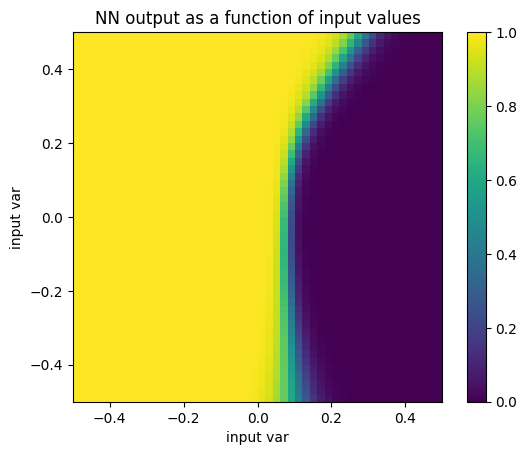

In [22]:
# display image
plt.imshow(y_out,origin='lower',extent=(-0.5,0.5,-0.5,0.5))
plt.colorbar()
plt.title("NN output as a function of input values")
plt.xlabel("input var")
plt.ylabel("input var")
plt.show()

Notice that, the shape of the output is already more complex than that of a simple network without hidden layer.

Can we apply network to many samples in parallel (no 'for' loops!) ?

In [23]:
# Make sure to read about python broadcasting
W=np.zeros([7,8])
x=np.zeros([8,30])
B=np.zeros(7)
result=np.dot(W,x)+B # will produce an error!

ValueError: operands could not be broadcast together with shapes (7,30) (7,) 

In [ ]:
np.shape(np.dot(W,x))

In [ ]:
np.shape(B)

In [24]:
# But with a re-ordering of indices, this works!
W=np.zeros([8,7])
x=np.zeros([30,8])
B=np.zeros(7)
result=np.dot(x,W)+B

In [25]:
np.shape(np.dot(x,W))

(30, 7)

In [26]:
np.shape(B)

(7,)

In [27]:
def apply_layer_new(x_in,w,b): # a function that applies a layer
    z=np.dot(x_in,w)+b # note different order in matrix product!
    return(1/(1+np.exp(-z)))

In [28]:
def apply_net_new(x_in): # same as before, but with new layer function
    global w1,b1,w2,b2

    y1=apply_layer_new(x_in,w1,b1)
    y2=apply_layer_new(y1,w2,b2)
    return(y2)

In [29]:
N0=2 # input layer size
N1=5 # hidden layer size
N2=1 # output layer size

# from input layer to hidden layer:
w1=np.random.uniform(low=-10,high=+10,size=(N0,N1)) # NEW ORDER!! N0xN1
b1=np.random.uniform(low=-1,high=+1,size=N1) # biases: N1 vector

# from hidden layer to output layer:
w2=np.random.uniform(low=-10,high=+10,size=(N1,N2)) # NEW ORDER N1xN2
b2=np.random.uniform(low=-1,high=+1,size=N2) # biases

Set up for batch processing, i.e. parallel evaluation of many input samples!

In [30]:
batchsize=10000
x_in=np.random.uniform(low=-1,high=1,size=(batchsize,2))
x_in

array([[ 0.1014109 ,  0.65431224],
       [-0.6006814 , -0.61496973],
       [-0.4816034 ,  0.46702398],
       ...,
       [-0.18376553,  0.35073239],
       [ 0.88558504,  0.31505332],
       [-0.71717729, -0.36331792]])

In [31]:
y_out=apply_net_new(x_in)

In [32]:
np.shape(y_out)
# these were 10000 samples evaluated in parallel!!!

(10000, 1)

Now we will do multi-layer neural-net again, but more efficiently!

In [33]:
M=50
# Generate a 'mesh grid', i.e. x,y values in an image
v0,v1=np.meshgrid(np.linspace(-0.5,0.5,M),np.linspace(-0.5,0.5,M))
np.shape(v0), np.shape(v1)

((50, 50), (50, 50))

In [34]:
v0flat=v0.flatten() # make 1D array out of 2D array
v1flat=v1.flatten()
# that means: MxM matrix becomes M^2 vector
np.shape(v0flat), np.shape(v1flat)

((2500,), (2500,))

In [35]:
batchsize=np.shape(v0flat)[0]
x_in=np.zeros([batchsize,2]) # place-holder
x_in[:,0]=v0flat # fill first component (index 0)
x_in[:,1]=v1flat # fill second component
x_in

array([[-0.5       , -0.5       ],
       [-0.47959184, -0.5       ],
       [-0.45918367, -0.5       ],
       ...,
       [ 0.45918367,  0.5       ],
       [ 0.47959184,  0.5       ],
       [ 0.5       ,  0.5       ]])

In [36]:
# apply net to all these samples simultaneously!
y_out=apply_net_new(x_in)

In [37]:
y_out

array([[0.00529296],
       [0.00589202],
       [0.00665002],
       ...,
       [0.07983456],
       [0.0846784 ],
       [0.08909025]])

In [38]:
np.shape(y_out) # this is not a vector but a matrix with dimention = batchsize x 1

(2500, 1)

In [43]:
# turn this back into a 2D matrix (image)
y_2D=np.reshape(y_out[:,0],[M,M])
np.shape(y_2D)


(50, 50)

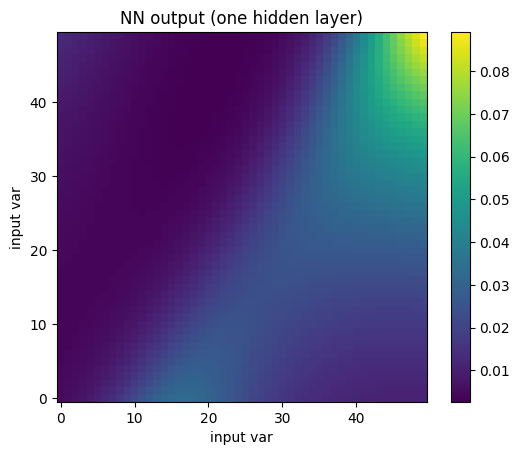

In [40]:
plt.imshow(y_2D,origin='lower')
plt.title("NN output (one hidden layer)")
plt.xlabel("input var")
plt.ylabel("input var")
plt.colorbar()
plt.show()

What about more hidden layers? Let's try a NN with 21 hidden layers!

In [44]:
Nlayers=20
LayerSize=100

Weights=np.random.uniform(low=-3,high=3,size=[Nlayers,LayerSize,LayerSize])
Biases=np.random.uniform(low=-1,high=1,size=[Nlayers,LayerSize])

# for the first hidden layer (coming in from the input layer)
WeightsFirst=np.random.uniform(low=-1,high=1,size=[2,LayerSize])
BiasesFirst=np.random.uniform(low=-1,high=1,size=LayerSize)

# for the final layer (i.e. the output neuron)
WeightsFinal=np.random.uniform(low=-1,high=1,size=[LayerSize,1])
BiasesFinal=np.random.uniform(low=-1,high=1,size=1)

In [45]:
def apply_multi_net(x_in):
    global Weights, Biases, WeightsFinal, BiasesFinal, Nlayers

    y=apply_layer_new(x_in,WeightsFirst,BiasesFirst)
    for j in range(Nlayers):
        #print (j)
        y=apply_layer_new(y,Weights[j,:,:],Biases[j,:])
    output=apply_layer_new(y,WeightsFinal,BiasesFinal)
    return(output)

In [46]:
# Generate a 'mesh grid', i.e. x,y values in an image
M=40
v0,v1=np.meshgrid(np.linspace(-0.5,0.5,M),np.linspace(-0.5,0.5,M))
batchsize=M**2 # number of samples = number of pixels = M^2
x_in=np.zeros([batchsize,2])
x_in[:,0]=v0.flatten() # fill first component (index 0)
x_in[:,1]=v1.flatten() # fill second component

In [47]:
# use the MxM input grid that we generated above
y_out=apply_multi_net(x_in) # apply net to all these samples!

In [48]:
y_2D=np.reshape(y_out[:,0],[M,M]) # back to 2D image
y_2D

array([[0.95112864, 0.96538883, 0.92142371, ..., 0.6550645 , 0.69097537,
        0.44107997],
       [0.95072246, 0.82527303, 0.84866923, ..., 0.82372082, 0.81292843,
        0.95981658],
       [0.96599474, 0.91273552, 0.85047519, ..., 0.72230382, 0.8204442 ,
        0.94517215],
       ...,
       [0.82925369, 0.61603692, 0.61987572, ..., 0.53822783, 0.89687058,
        0.91039167],
       [0.59576339, 0.91383775, 0.66584923, ..., 0.41620154, 0.62743161,
        0.90715997],
       [0.21130722, 0.87429713, 0.79433142, ..., 0.50658724, 0.74276457,
        0.75938983]])

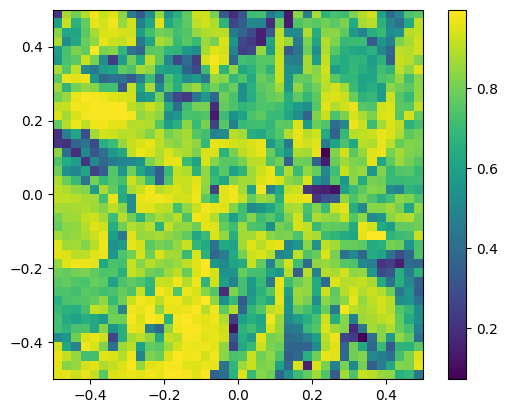

In [49]:
plt.imshow(y_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest')
plt.colorbar()
plt.show()

Now do the same, but high-resolution (400x400 picture) to capture visualise the complexity of predicted y

In [50]:
M=400
# Generate a 'mesh grid', i.e. x,y values in an image
v0,v1=np.meshgrid(np.linspace(-0.5,0.5,M),np.linspace(-0.5,0.5,M))
batchsize=M**2 # number of samples = number of pixels = M^2
x_in=np.zeros([batchsize,2])
x_in[:,0]=v0.flatten() # fill first component (index 0)
x_in[:,1]=v1.flatten() # fill second component

In [51]:
# use the MxM input grid that we generated above
y_out=apply_multi_net(x_in) # apply net to all these samples!

In [52]:
y_2D=np.reshape(y_out[:,0],[M,M]) # back to 2D image

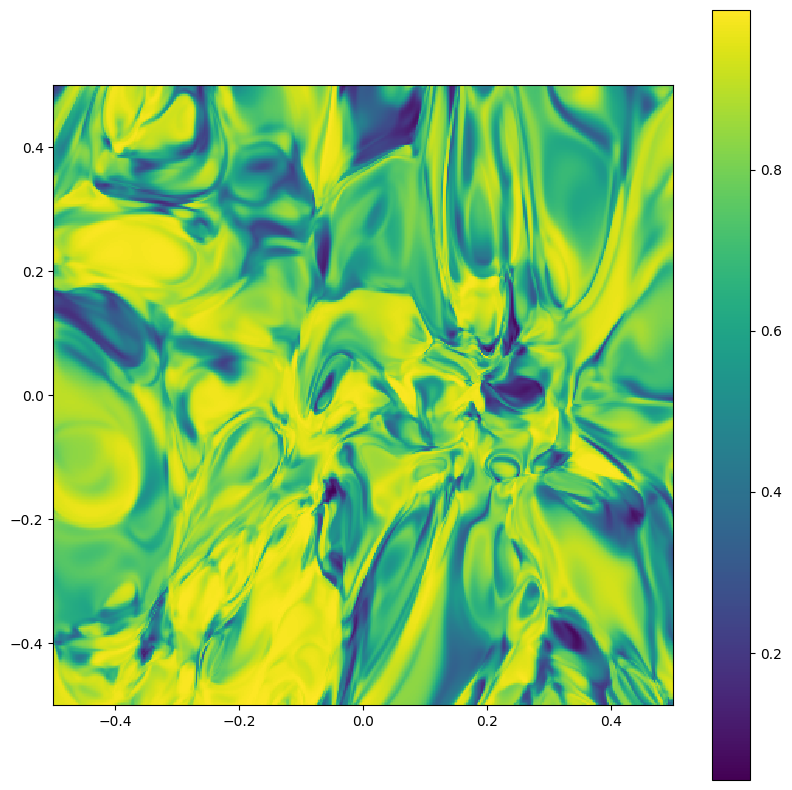

In [53]:
plt.figure(figsize=[10,10])
#plt.axes([0,0,1,1]) # fill all of the picture with the image
plt.imshow(y_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest')
#plt.imshow(y_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5])
#plt.axis('off') # no axes
plt.colorbar()
plt.show()
